In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format='svg'

G:\newage2\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df=pd.read_csv('train_Data.csv')

In [3]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')

In [4]:
df_min=df[df['9']==1]

In [5]:
df_min.to_csv('glass0_minority_train.csv',index=False)
df_min=pd.read_csv('glass0_minority_train.csv')

In [6]:
df_majority=df[df['9']==0]
df_majority.to_csv('glass0_majority_train.csv',index=False)
df_majority=pd.read_csv('glass0_majority_train.csv')

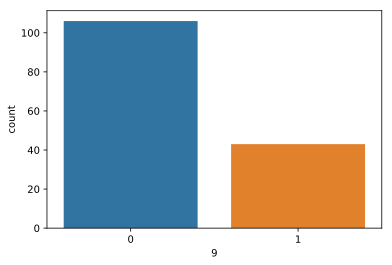

In [7]:
%matplotlib inline
sns.countplot(x='9',data=df)

In [8]:
def create_dataset(dataset,look_back=1):
    
    datax,datay=[],[]
    
    for i in range(len(dataset)-look_back-1):
        a=dataset[i:(i+look_back),:]
        datax.append(a)
        datay.append(dataset[i+look_back,:])
    
    return np.array(datax),np.array(datay)

In [9]:
df_minor=np.array(df_min)
scaler=MinMaxScaler(feature_range=(0,1))

df_minor=scaler.fit_transform(df_min)

x,y=create_dataset(df_minor,5)#5
print(x.shape)
print(y.shape)

(37, 5, 10)
(37, 10)


In [10]:
Xtrain,xtest,Ytrain,ytest=train_test_split(x,y,test_size=0.40,random_state=60)

In [11]:
model=Sequential()
model.add(LSTM(20,input_shape=(Xtrain.shape[1],Xtrain.shape[2])))#5
model.add(Dense(10))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 20)                2480      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
Total params: 2,690
Trainable params: 2,690
Non-trainable params: 0
_________________________________________________________________
None


In [12]:
model.compile(loss='mse',optimizer='adam')

In [13]:
history=model.fit(Xtrain,Ytrain,epochs=1000,verbose=1)

Epoch 1/1000
22/22 [==============================] - 3s 125ms/step - loss: 0.2666
Epoch 2/1000
22/22 [==============================] - 0s 729us/step - loss: 0.2606
Epoch 3/1000
22/22 [==============================] - 0s 820us/step - loss: 0.2538
Epoch 4/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.2469
Epoch 5/1000
22/22 [==============================] - 0s 984us/step - loss: 0.2400
Epoch 6/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.2332
Epoch 7/1000
22/22 [==============================] - 0s 957us/step - loss: 0.2265
Epoch 8/1000
22/22 [==============================] - 0s 911us/step - loss: 0.2200
Epoch 9/1000
22/22 [==============================] - 0s 957us/step - loss: 0.2137
Epoch 10/1000
22/22 [==============================] - 0s 957us/step - loss: 0.2075
Epoch 11/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.2014
Epoch 12/1000
22/22 [==============================] - 0s 888us/step - loss: 0.1954
Epoch 1

22/22 [==============================] - 0s 729us/step - loss: 0.0305
Epoch 100/1000
22/22 [==============================] - 0s 911us/step - loss: 0.0305
Epoch 101/1000
22/22 [==============================] - 0s 775us/step - loss: 0.0305
Epoch 102/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0304
Epoch 103/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0304
Epoch 104/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0304
Epoch 105/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0304
Epoch 106/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0303
Epoch 107/1000
22/22 [==============================] - 0s 980us/step - loss: 0.0303
Epoch 108/1000
22/22 [==============================] - 0s 934us/step - loss: 0.0303
Epoch 109/1000
22/22 [==============================] - 0s 980us/step - loss: 0.0303
Epoch 110/1000
22/22 [==============================] - 0s 934us/step - loss: 0.0302
Epoch

Epoch 197/1000
22/22 [==============================] - 0s 843us/step - loss: 0.0284
Epoch 198/1000
22/22 [==============================] - 0s 911us/step - loss: 0.0284
Epoch 199/1000
22/22 [==============================] - 0s 980us/step - loss: 0.0283
Epoch 200/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0283
Epoch 201/1000
22/22 [==============================] - 0s 957us/step - loss: 0.0283
Epoch 202/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0283
Epoch 203/1000
22/22 [==============================] - 0s 934us/step - loss: 0.0283
Epoch 204/1000
22/22 [==============================] - 0s 934us/step - loss: 0.0282
Epoch 205/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 206/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0282
Epoch 207/1000
22/22 [==============================] - 0s 934us/step - loss: 0.0282
Epoch 208/1000
22/22 [==============================] - 0s 1ms/step - los

Epoch 294/1000
22/22 [==============================] - 0s 957us/step - loss: 0.0265
Epoch 295/1000
22/22 [==============================] - 0s 775us/step - loss: 0.0265
Epoch 296/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0265
Epoch 297/1000
22/22 [==============================] - 0s 911us/step - loss: 0.0264
Epoch 298/1000
22/22 [==============================] - 0s 911us/step - loss: 0.0264
Epoch 299/1000
22/22 [==============================] - 0s 973us/step - loss: 0.0264
Epoch 300/1000
22/22 [==============================] - 0s 934us/step - loss: 0.0264
Epoch 301/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0264
Epoch 302/1000
22/22 [==============================] - 0s 912us/step - loss: 0.0263
Epoch 303/1000
22/22 [==============================] - 0s 866us/step - loss: 0.0263
Epoch 304/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0263
Epoch 305/1000
22/22 [==============================] - 0s 957us/step -

Epoch 392/1000
22/22 [==============================] - 0s 889us/step - loss: 0.0241
Epoch 393/1000
22/22 [==============================] - 0s 912us/step - loss: 0.0241
Epoch 394/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0241
Epoch 395/1000
22/22 [==============================] - 0s 775us/step - loss: 0.0241
Epoch 396/1000
22/22 [==============================] - 0s 980us/step - loss: 0.0240
Epoch 397/1000
22/22 [==============================] - 0s 980us/step - loss: 0.0240
Epoch 398/1000
22/22 [==============================] - 0s 889us/step - loss: 0.0240
Epoch 399/1000
22/22 [==============================] - 0s 957us/step - loss: 0.0239
Epoch 400/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0239
Epoch 401/1000
22/22 [==============================] - 0s 843us/step - loss: 0.0239
Epoch 402/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0238
Epoch 403/1000
22/22 [==============================] - 0s 889us/step -

22/22 [==============================] - 0s 821us/step - loss: 0.0206
Epoch 490/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0205
Epoch 491/1000
22/22 [==============================] - 0s 729us/step - loss: 0.0205
Epoch 492/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 493/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0204
Epoch 494/1000
22/22 [==============================] - 0s 843us/step - loss: 0.0203
Epoch 495/1000
22/22 [==============================] - 0s 843us/step - loss: 0.0203
Epoch 496/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0202
Epoch 497/1000
22/22 [==============================] - 0s 934us/step - loss: 0.0202
Epoch 498/1000
22/22 [==============================] - 0s 934us/step - loss: 0.0201
Epoch 499/1000
22/22 [==============================] - 0s 934us/step - loss: 0.0201
Epoch 500/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0200
Epoch

Epoch 587/1000
22/22 [==============================] - 0s 821us/step - loss: 0.0151
Epoch 588/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0151
Epoch 589/1000
22/22 [==============================] - 0s 866us/step - loss: 0.0150
Epoch 590/1000
22/22 [==============================] - 0s 775us/step - loss: 0.0150
Epoch 591/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0149
Epoch 592/1000
22/22 [==============================] - 0s 866us/step - loss: 0.0149
Epoch 593/1000
22/22 [==============================] - 0s 957us/step - loss: 0.0148
Epoch 594/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0148
Epoch 595/1000
22/22 [==============================] - 0s 980us/step - loss: 0.0147
Epoch 596/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0147
Epoch 597/1000
22/22 [==============================] - 0s 980us/step - loss: 0.0146
Epoch 598/1000
22/22 [==============================] - 0s 1ms/step - los

Epoch 685/1000
22/22 [==============================] - 0s 912us/step - loss: 0.0106
Epoch 686/1000
22/22 [==============================] - 0s 775us/step - loss: 0.0106
Epoch 687/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 688/1000
22/22 [==============================] - 0s 775us/step - loss: 0.0105
Epoch 689/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 690/1000
22/22 [==============================] - 0s 911us/step - loss: 0.0104
Epoch 691/1000
22/22 [==============================] - 0s 980us/step - loss: 0.0104
Epoch 692/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 693/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 694/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 695/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 696/1000
22/22 [==============================] - 0s 1ms/step - loss: 0

Epoch 782/1000
22/22 [==============================] - 0s 958us/step - loss: 0.0079
Epoch 783/1000
22/22 [==============================] - 0s 775us/step - loss: 0.0078
Epoch 784/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 785/1000
22/22 [==============================] - 0s 775us/step - loss: 0.0078
Epoch 786/1000
22/22 [==============================] - 0s 820us/step - loss: 0.0078
Epoch 787/1000
22/22 [==============================] - 0s 775us/step - loss: 0.0078
Epoch 788/1000
22/22 [==============================] - 0s 820us/step - loss: 0.0078
Epoch 789/1000
22/22 [==============================] - 0s 729us/step - loss: 0.0077
Epoch 790/1000
22/22 [==============================] - 0s 957us/step - loss: 0.0077
Epoch 791/1000
22/22 [==============================] - 0s 911us/step - loss: 0.0077
Epoch 792/1000
22/22 [==============================] - 0s 911us/step - loss: 0.0077
Epoch 793/1000
22/22 [==============================] - 0s 957us/st

Epoch 879/1000
22/22 [==============================] - 0s 866us/step - loss: 0.0062
Epoch 880/1000
22/22 [==============================] - 0s 729us/step - loss: 0.0062
Epoch 881/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 882/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 883/1000
22/22 [==============================] - 0s 957us/step - loss: 0.0062
Epoch 884/1000
22/22 [==============================] - 0s 822us/step - loss: 0.0062
Epoch 885/1000
22/22 [==============================] - 0s 934us/step - loss: 0.0062
Epoch 886/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 887/1000
22/22 [==============================] - 0s 957us/step - loss: 0.0061
Epoch 888/1000
22/22 [==============================] - 0s 889us/step - loss: 0.0061
Epoch 889/1000
22/22 [==============================] - 0s 911us/step - loss: 0.0061
Epoch 890/1000
22/22 [==============================] - 0s 934us/step -

Epoch 976/1000
22/22 [==============================] - 0s 957us/step - loss: 0.0051
Epoch 977/1000
22/22 [==============================] - 0s 957us/step - loss: 0.0051
Epoch 978/1000
22/22 [==============================] - 0s 820us/step - loss: 0.0051
Epoch 979/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 980/1000
22/22 [==============================] - 0s 911us/step - loss: 0.0051
Epoch 981/1000
22/22 [==============================] - 0s 957us/step - loss: 0.0051
Epoch 982/1000
22/22 [==============================] - 0s 911us/step - loss: 0.0051
Epoch 983/1000
22/22 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 984/1000
22/22 [==============================] - 0s 911us/step - loss: 0.0050
Epoch 985/1000
22/22 [==============================] - 0s 820us/step - loss: 0.0050
Epoch 986/1000
22/22 [==============================] - 0s 866us/step - loss: 0.0050
Epoch 987/1000
22/22 [==============================] - 0s 911us/step

In [14]:
model.save('glass0.h5')

In [15]:
Xtrain.shape

(22, 5, 10)

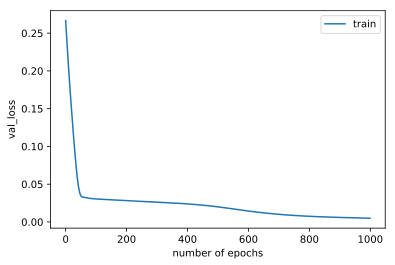

In [16]:
plt.plot(history.history['loss'],label='train')
#plt.plot(history.history['val_loss'],label='test')
plt.xlabel('number of epochs')
plt.ylabel('val_loss')
plt.legend()
#pyplot.savefig('LSTM training.png',dpi=300)
plt.show()

In [17]:
prediction=model.predict(xtest)

In [18]:
def draw_prediction(ytest,d,columns):
    
    _,axes=plt.subplots(len(columns),1,figsize=(10,20))
    
    for i,cols in enumerate(columns):
        
        axes[i].plot(ytest[:,i],label='real',color='blue')
        axes[i].plot(d[:,i],label='prediction',color='orange')
        #axes[i].set_xlabel='index'
        #axes[i].set_ylabel=cols
        axes[i].xlabel='index'
        axes[i].ylabel=cols

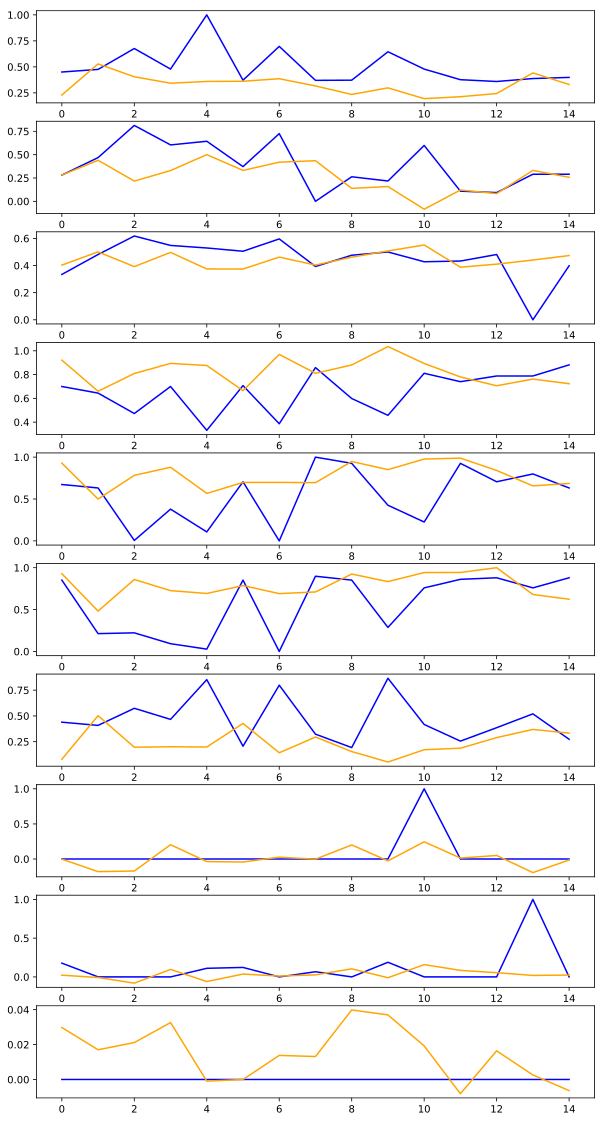

In [19]:
clmns=df.columns
draw_prediction(ytest,prediction,clmns)

In [20]:
prediction

array([[ 2.2935948e-01,  2.8133789e-01,  4.0312961e-01,  9.2123407e-01,
         9.2882675e-01,  9.2856389e-01,  7.9117626e-02, -2.0244606e-03,
         2.2447368e-02,  2.9769488e-02],
       [ 5.2860582e-01,  4.3970463e-01,  5.0074321e-01,  6.5917552e-01,
         4.9947101e-01,  4.8171365e-01,  5.0256735e-01, -1.7971428e-01,
        -7.6309834e-03,  1.7034106e-02],
       [ 4.0486613e-01,  2.1681167e-01,  3.9214650e-01,  8.0892169e-01,
         7.8289521e-01,  8.5914618e-01,  1.9616860e-01, -1.7106660e-01,
        -8.0451198e-02,  2.1160744e-02],
       [ 3.4306970e-01,  3.2943654e-01,  4.9687710e-01,  8.9379704e-01,
         8.7889475e-01,  7.2633320e-01,  2.0079252e-01,  2.0358323e-01,
         9.6498929e-02,  3.2618769e-02],
       [ 3.6002761e-01,  5.0005943e-01,  3.7463591e-01,  8.7624162e-01,
         5.6686831e-01,  6.9234669e-01,  1.9833523e-01, -3.6399115e-02,
        -5.9755363e-02, -9.5300749e-04],
       [ 3.6173517e-01,  3.3104593e-01,  3.7420893e-01,  6.6440839e-01,
   

In [21]:
prediction2=scaler.inverse_transform(prediction)

In [22]:
ytest2=scaler.inverse_transform(ytest)

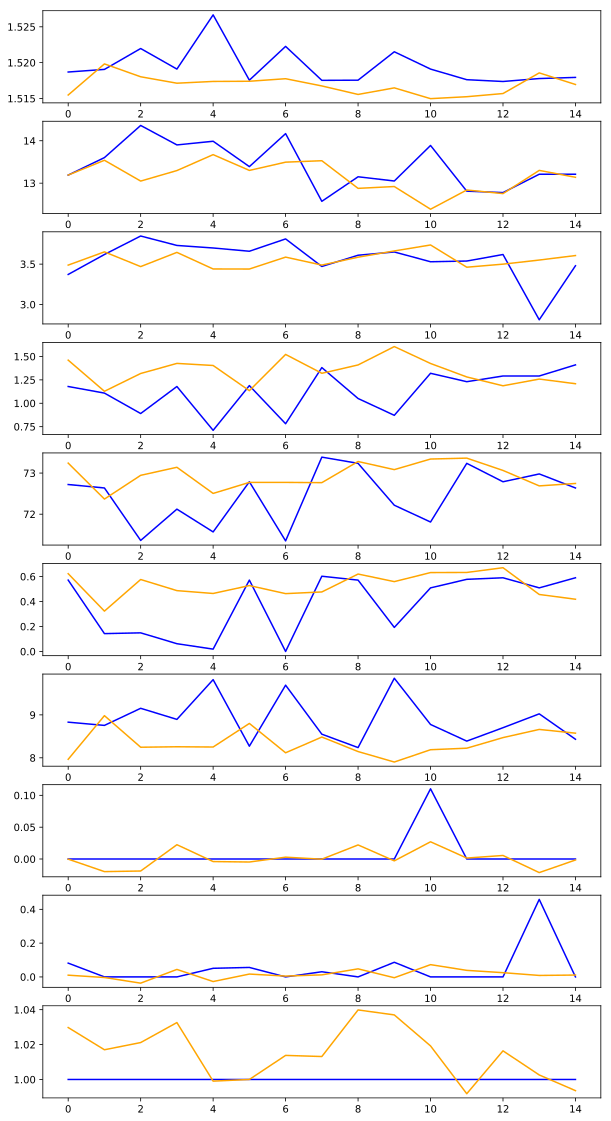

In [23]:
draw_prediction(ytest2,prediction2,clmns)

In [24]:
prediction

array([[ 2.2935948e-01,  2.8133789e-01,  4.0312961e-01,  9.2123407e-01,
         9.2882675e-01,  9.2856389e-01,  7.9117626e-02, -2.0244606e-03,
         2.2447368e-02,  2.9769488e-02],
       [ 5.2860582e-01,  4.3970463e-01,  5.0074321e-01,  6.5917552e-01,
         4.9947101e-01,  4.8171365e-01,  5.0256735e-01, -1.7971428e-01,
        -7.6309834e-03,  1.7034106e-02],
       [ 4.0486613e-01,  2.1681167e-01,  3.9214650e-01,  8.0892169e-01,
         7.8289521e-01,  8.5914618e-01,  1.9616860e-01, -1.7106660e-01,
        -8.0451198e-02,  2.1160744e-02],
       [ 3.4306970e-01,  3.2943654e-01,  4.9687710e-01,  8.9379704e-01,
         8.7889475e-01,  7.2633320e-01,  2.0079252e-01,  2.0358323e-01,
         9.6498929e-02,  3.2618769e-02],
       [ 3.6002761e-01,  5.0005943e-01,  3.7463591e-01,  8.7624162e-01,
         5.6686831e-01,  6.9234669e-01,  1.9833523e-01, -3.6399115e-02,
        -5.9755363e-02, -9.5300749e-04],
       [ 3.6173517e-01,  3.3104593e-01,  3.7420893e-01,  6.6440839e-01,
   

In [25]:
new_data=pd.DataFrame(prediction2)

In [26]:
new_data.to_csv('new_corrected_data-v1.csv',index=False)